### Import libraries

In [814]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Dataset preparation

In [815]:
data = pd.read_csv('CarData.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [816]:
data['Year'].max()

2018

In [817]:
initial_data = data.copy()
data.drop('Car_Name' , axis = 1, inplace = True)
data.insert(1 , 'Age' , 2019-data['Year'])
data.drop('Year' , axis = 1, inplace = True)

<!-- 
data['Fuel_Type'].replace({'CNG':2 , 'Petrol':4 , 'Diesel':6} , inplace=True)
data['Seller_Type'].replace({'Individual':2 , 'Dealer':4} , inplace=True)
data['Transmission'].replace({'Manual':2 , 'Automatic':4} , inplace=True) -->

In [818]:
df1 = pd.DataFrame(data)

In [819]:
df1.describe(include = 'all')

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,NaN,NaN,NaN,NaN,3,2,2,NaN
top,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,5.372093,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,1.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,3.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,5.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,7.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [820]:
###   There are no missing values in this dataset.
#####   Type 1 error = Missing value     DONE!   #####

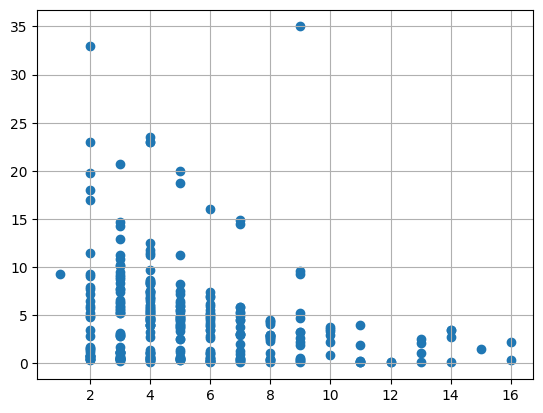

In [821]:
plt.scatter(df1['Age'] , df1['Selling_Price'])
plt.grid()

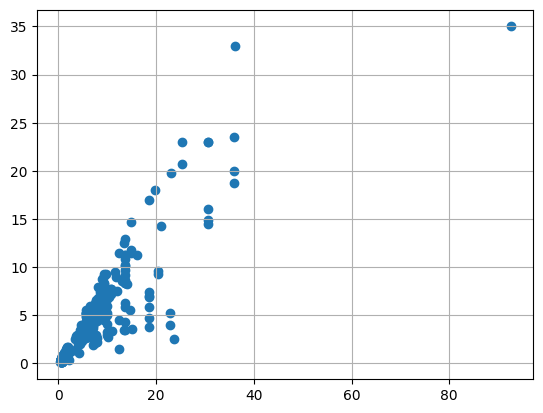

In [822]:
plt.scatter(df1['Present_Price'] , df1['Selling_Price'])
plt.grid()

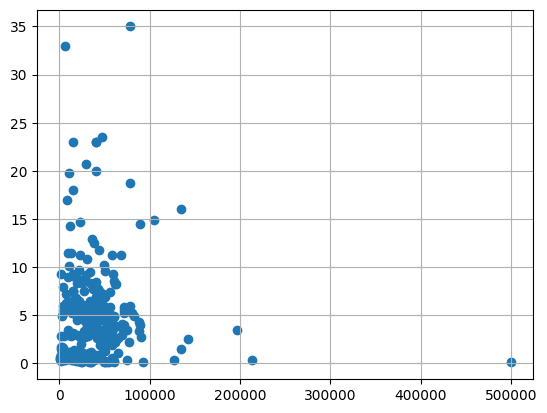

In [823]:
plt.scatter(df1['Kms_Driven'] , df1['Selling_Price'])
plt.grid()

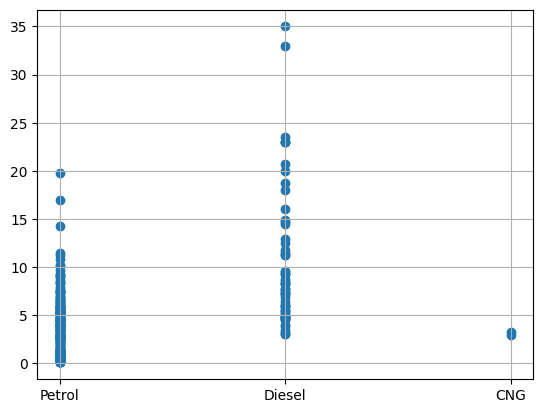

In [824]:
plt.scatter(df1['Fuel_Type'] , df1['Selling_Price'])
plt.grid()

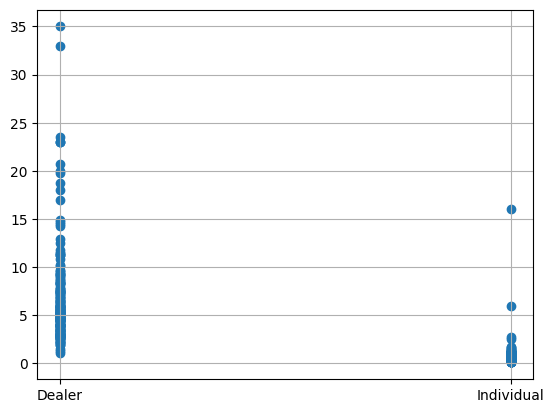

In [825]:
plt.scatter(df1['Seller_Type'] , df1['Selling_Price'])
plt.grid()

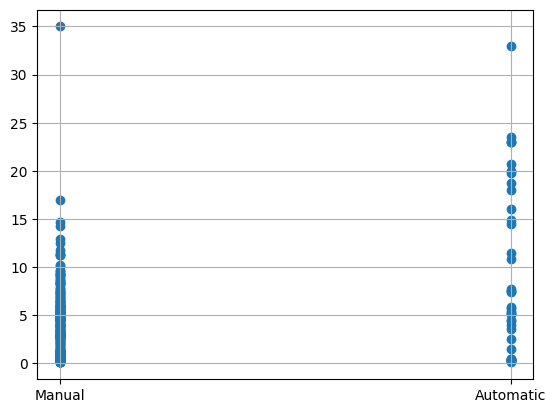

In [826]:
plt.scatter(df1['Transmission'] , df1['Selling_Price'])
plt.grid()

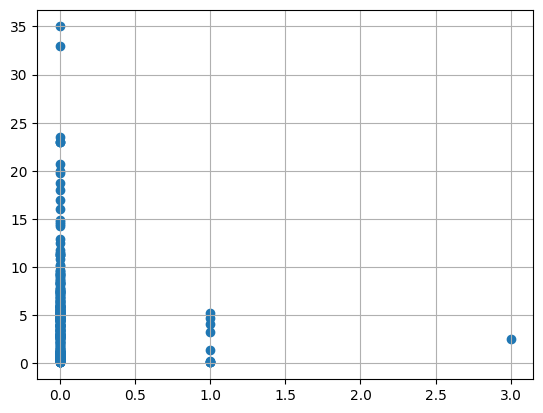

In [827]:
plt.scatter(df1['Owner'] , df1['Selling_Price'])
plt.grid()

In [828]:
df1[df1['Selling_Price'] > 30]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,2,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,9,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [829]:
initial_data[initial_data['Car_Name'] == 'land cruiser']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [830]:
df1[(df1['Seller_Type'] == 'Dealer') & (df1['Selling_Price'] > 15)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
52,2,18.00,19.77,15000,Diesel,Dealer,Automatic,0
59,5,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,4,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,2,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,2,19.75,23.15,11000,Petrol,Dealer,Automatic,0
82,2,23.00,25.39,15000,Diesel,Dealer,Automatic,0
86,9,35.00,92.60,78000,Diesel,Dealer,Manual,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [831]:
###   Noises:
###   Kms_Driven < 230000     =>  X
###   Owner != 3
###   Selling_Price < 25
###   Selling_Price < 5 (in Seller_Type = 'Individual')     =>  X

In [832]:
df2 = df1# [df1['Kms_Driven'] < 230000]

In [833]:
df3 = df2[df2['Owner'] != 3]

In [834]:
df4 = df3[df3['Selling_Price'] < 25]
# df4.drop(df4[(df4['Seller_Type'] == 'Individual') & (df4['Selling_Price'] > 5)].index, inplace = True)

In [835]:
df4.describe(include = 'all')

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,298.000000,298.000000,298.000000,298.000000,298,298,298,298.000000
unique,NaN,NaN,NaN,NaN,3,2,2,NaN
top,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,NaN,NaN,NaN,NaN,238,193,260,NaN
mean,5.345638,4.471644,7.193322,36560.768456,NaN,NaN,NaN,0.033557
std,2.857679,4.499002,6.880981,38487.099107,NaN,NaN,NaN,0.180389
min,1.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,3.000000,0.825000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,5.000000,3.555000,6.075000,32000.000000,NaN,NaN,NaN,0.000000
75%,7.000000,6.000000,9.757500,47750.000000,NaN,NaN,NaN,0.000000


In [836]:
#####   Type 2 error = Noise     DONE!   #####

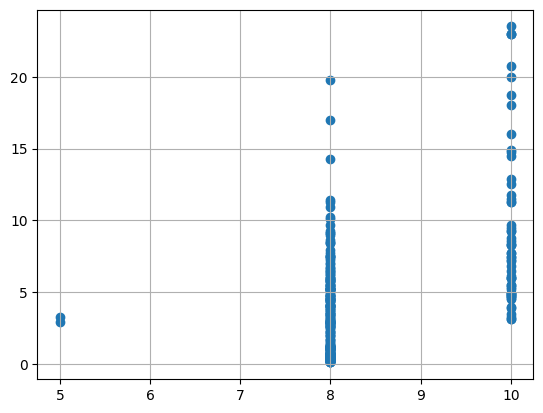

In [837]:
df_test_1 = df4.copy()
df_test_1['Fuel_Type'].replace({'CNG':5 , 'Petrol':8 , 'Diesel':10}, inplace = True)
plt.scatter(df_test_1['Fuel_Type'] , df_test_1['Selling_Price'])
plt.grid()

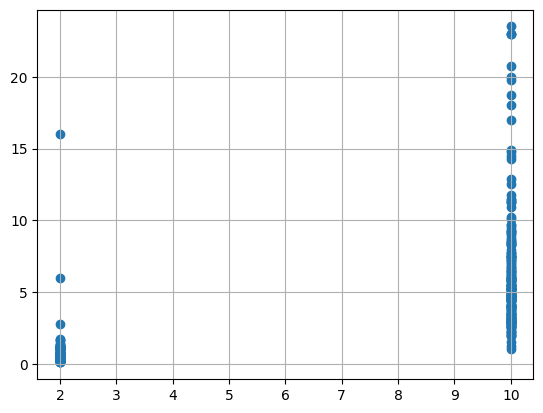

In [838]:
df_test_2 = df_test_1.copy()
df_test_2['Seller_Type'].replace({'Individual':2 , 'Dealer':10} , inplace=True)
plt.scatter(df_test_2['Seller_Type'] , df_test_2['Selling_Price'])
plt.grid()

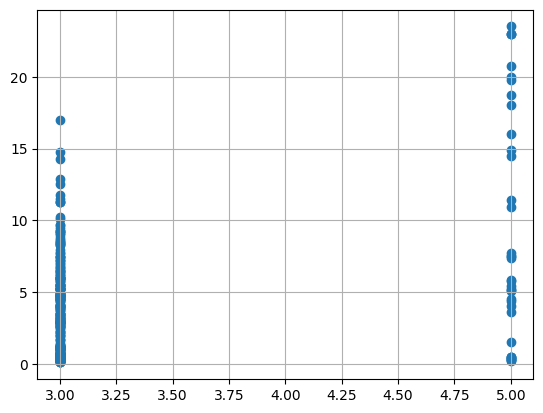

In [839]:
df_test_3 = df_test_2.copy()
df_test_3['Transmission'].replace({'Manual':3 , 'Automatic':5} , inplace=True)
plt.scatter(df_test_3['Transmission'] , df_test_3['Selling_Price'])
plt.grid()

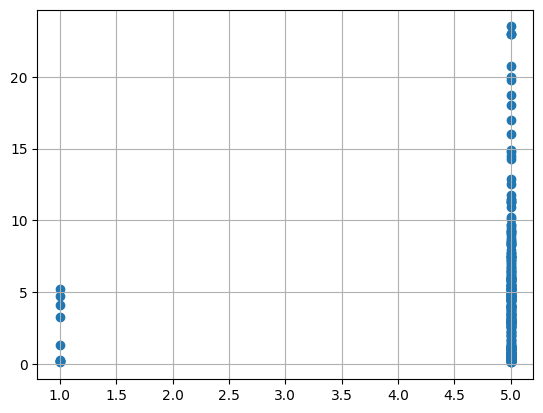

In [840]:
df_test_4 = df_test_3.copy()
df_test_4['Owner'].replace({0:5} , inplace=True)
plt.scatter(df_test_4['Owner'] , df_test_4['Selling_Price'])
plt.grid()

In [841]:
df5 = df_test_4.copy()

########################   Our dataset is ready for modeling.   ########################

### Final plots

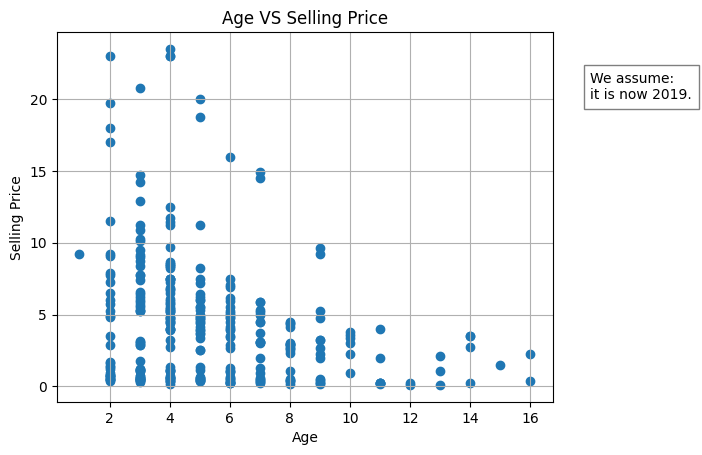

In [842]:
plt.scatter(df5['Age'] , df5['Selling_Price'])
plt.title('Age VS Selling Price')
plt.xlabel('Age')
plt.ylabel('Selling Price')
bbox = {'facecolor' : 'white' , 'alpha' : 0.5 , 'pad' : 5}
plt.text(18 , 20 , 'We assume:\nit is now 2019.' , bbox = bbox)
plt.grid()
plt.show()

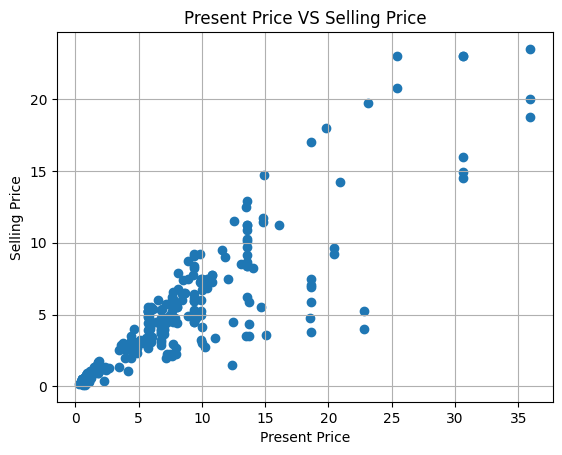

In [843]:
plt.scatter(df5['Present_Price'] , df5['Selling_Price'])
plt.title('Present Price VS Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.grid()
plt.show()

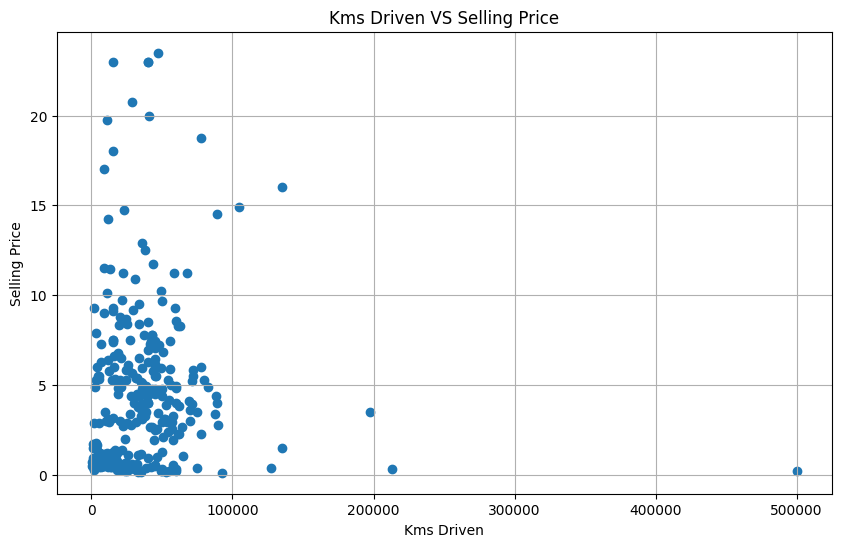

In [844]:
plt.figure(figsize = (10,6))
plt.scatter(df5['Kms_Driven'] , df5['Selling_Price'])
plt.title('Kms Driven VS Selling Price')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.grid()
plt.show()

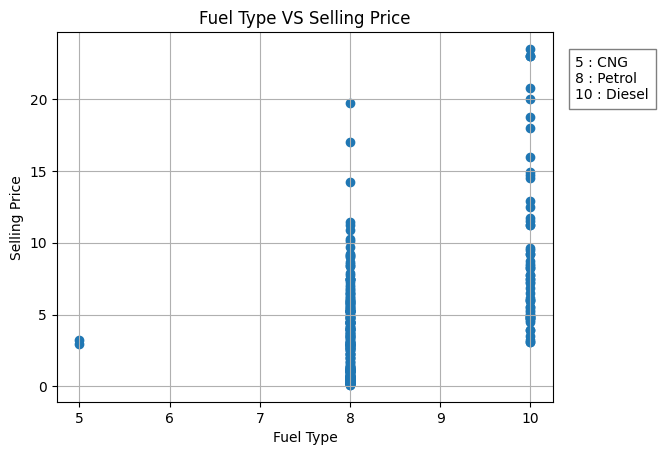

In [845]:
plt.scatter(df5['Fuel_Type'] , df5['Selling_Price'])
plt.title('Fuel Type VS Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.grid()
bbox = {'facecolor' : 'white' , 'alpha' : 0.5 , 'pad' : 5}
plt.text(10.5 , 20 , '5 : CNG\n8 : Petrol\n10 : Diesel' , bbox = bbox)
plt.show()

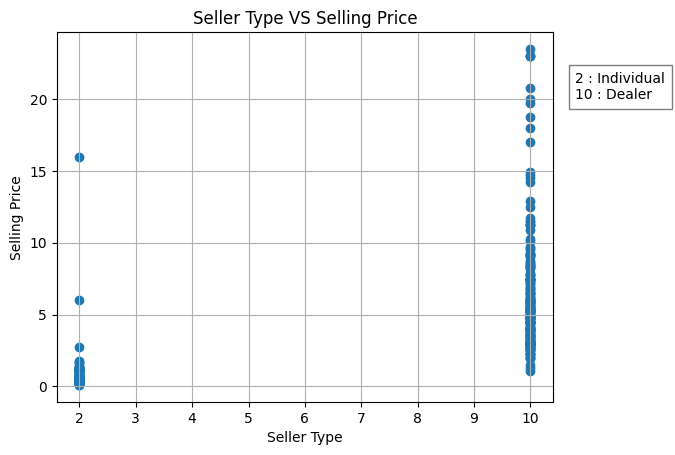

In [846]:
plt.scatter(df5['Seller_Type'] , df5['Selling_Price'])
plt.title('Seller Type VS Selling Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.grid()
bbox = {'facecolor' : 'white' , 'alpha' : 0.5 , 'pad' : 5}
plt.text(10.8 , 20 , '2 : Individual\n10 : Dealer' , bbox = bbox)
plt.show()

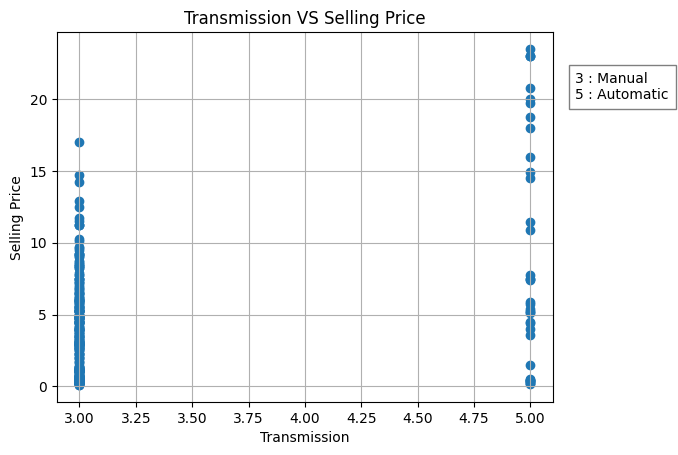

In [847]:
plt.scatter(df5['Transmission'] , df5['Selling_Price'])
plt.title('Transmission VS Selling Price')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.grid()
bbox = {'facecolor' : 'white' , 'alpha' : 0.5 , 'pad' : 5}
plt.text(5.2 , 20 , '3 : Manual\n5 : Automatic' , bbox = bbox)
plt.show()

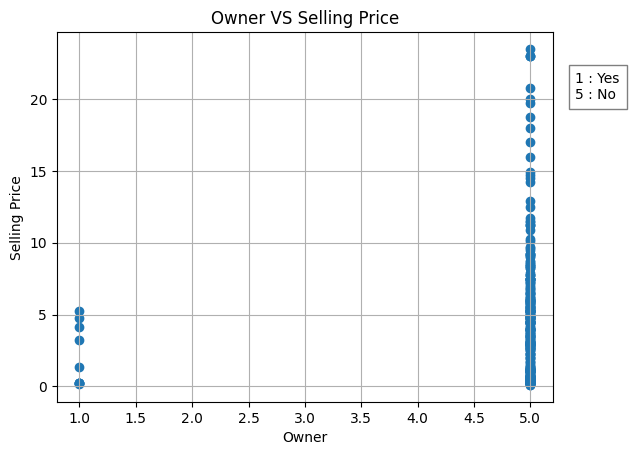

In [848]:
plt.scatter(df5['Owner'] , df5['Selling_Price'])
plt.title('Owner VS Selling Price')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.grid()
bbox = {'facecolor' : 'white' , 'alpha' : 0.5 , 'pad' : 5}
plt.text(5.4 , 20 , '1 : Yes\n5 : No' , bbox = bbox)
plt.show()

In [849]:
df5

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,8,10,3,5
1,6,4.75,9.54,43000,10,10,3,5
2,2,7.25,9.85,6900,8,10,3,5
3,8,2.85,4.15,5200,8,10,3,5
4,5,4.60,6.87,42450,10,10,3,5
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,10,10,3,5
297,4,4.00,5.90,60000,8,10,3,5
298,10,3.35,11.00,87934,8,10,3,5
299,2,11.50,12.50,9000,10,10,3,5


### Making the initial model

In [850]:
x = pd.DataFrame(df5 , columns = ['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
y = df5['Selling_Price'].values.reshape(-1,1)

In [851]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

In [852]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [853]:
y_pred = regressor.predict(x_test)

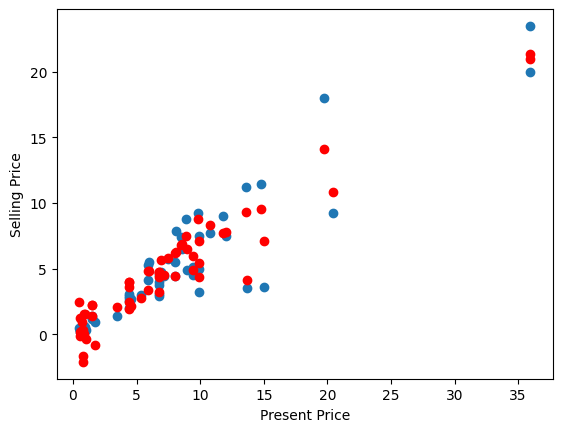

In [854]:
a = x_test.Present_Price
b = y_test
c = x_test.Present_Price
d = y_pred
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.scatter(a , b)
plt.scatter(c , d , color = 'red')
plt.show()

In [855]:
print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root mean Absolute Error : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score : ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  0.9372395499701511
Mean Squared Error :  1.469118781024335
Root mean Absolute Error :  0.9681113313922893
R2 Score :  0.9334118210784318


### Testing with cross validation and correlation

In [856]:
###   Cross Validation:

In [857]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [858]:
model_new = LinearRegression()
for i in range(4,11):
    print('-'*80)
    print(f'k-fold: {i}')
    kfold_validation = KFold(i)
    results = cross_val_score(model_new, x, y, cv = kfold_validation)
    print(results)
    print(np.mean(results))

--------------------------------------------------------------------------------
k-fold: 4
[0.88142687 0.82412897 0.19205596 0.81220066]
0.677453113421506
--------------------------------------------------------------------------------
k-fold: 5
[  0.89265744   0.81748285 -77.4011946    0.62969649   0.8498888 ]
-14.842293804420796
--------------------------------------------------------------------------------
k-fold: 6
[  0.72621089   0.68350881 -14.79096329 -14.65062028   0.80231832
   0.87055743]
-4.393164686126834
--------------------------------------------------------------------------------
k-fold: 7
[ 6.97046783e-01  8.20122701e-01  8.40369936e-01 -1.72771254e+02
 -6.09274752e-02  8.08422362e-01  8.70361071e-01]
-24.113694126214803
--------------------------------------------------------------------------------
k-fold: 8
[   0.69659481    0.89110386    0.78183918  -21.67110021 -274.58344563
    0.4648337     0.80525964    0.87283442]
-36.46776002908112
-------------------------

In [859]:
###   Correlation:

In [860]:
comp1 = np.corrcoef(df5.Age , df5.Selling_Price)
comp1

array([[ 1.        , -0.27254563],
       [-0.27254563,  1.        ]])

In [861]:
comp2 = np.corrcoef(df5.Present_Price , df5.Selling_Price)
comp2

array([[1.        , 0.89266942],
       [0.89266942, 1.        ]])

In [862]:
comp3 = np.corrcoef(df5.Kms_Driven , df5.Selling_Price)
comp3

array([[1.        , 0.03047868],
       [0.03047868, 1.        ]])

In [863]:
comp4 = np.corrcoef(df5.Fuel_Type , df5.Selling_Price)
comp4

array([[1.        , 0.52313583],
       [0.52313583, 1.        ]])

In [864]:
comp5 = np.corrcoef(df5.Seller_Type , df5.Selling_Price)
comp5

array([[1.        , 0.59385993],
       [0.59385993, 1.        ]])

In [865]:
comp6 = np.corrcoef(df5.Transmission , df5.Selling_Price)
comp6

array([[1.        , 0.38387433],
       [0.38387433, 1.        ]])

In [866]:
comp7 = np.corrcoef(df5.Owner , df5.Selling_Price)
comp7

array([[1.        , 0.10378701],
       [0.10378701, 1.        ]])

In [867]:
###   Therefore, the most important features:
# 1. Present_Price
# 2. Seller_Type
# 3. Fuel_Type
# 4. Transmission
# 5. Age (-)
# 6. Owner
# 7. Kms_Driven

########################   End of testing with cross validation & correlation   ########################

### Model analysis

In [868]:
print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root mean Absolute Error : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score : ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  0.9372395499701511
Mean Squared Error :  1.469118781024335
Root mean Absolute Error :  0.9681113313922893
R2 Score :  0.9334118210784318


In [869]:
x_test_review = x_test.copy()
x_test_review.insert(7, 'y_test', y_test)
x_test_review.insert(8, 'y_pred', y_pred)

In [870]:
df_review = x_test_review.sort_values(by = ['Kms_Driven'])

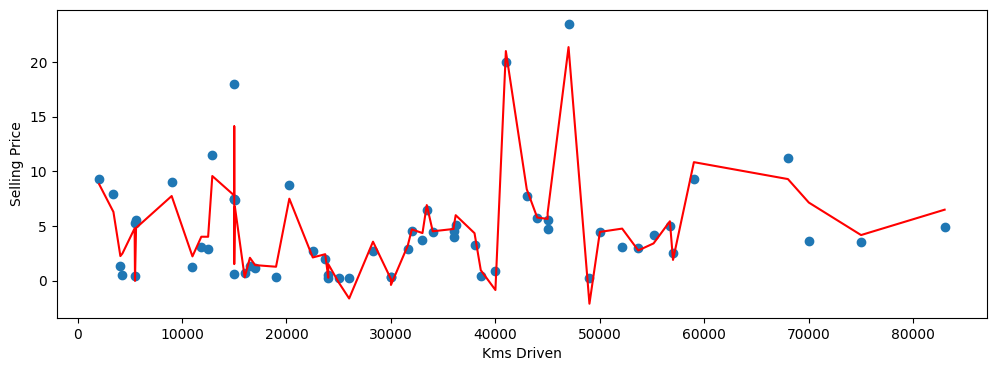

In [871]:
a = df_review.Kms_Driven
b = df_review.y_test
c = df_review.Kms_Driven
d = df_review.y_pred
plt.figure(figsize = (12,4))
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.scatter(a , b)
plt.plot(c , d , color = 'red')
plt.show()

In [872]:
df_review = x_test_review.sort_values(by = ['Present_Price'])

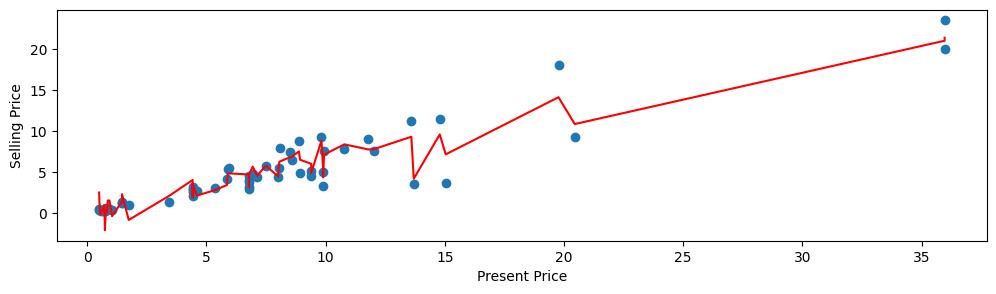

In [873]:
a = df_review.Present_Price
b = df_review.y_test
c = df_review.Present_Price
d = df_review.y_pred
plt.figure(figsize = (12,3))
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.scatter(a , b)
plt.plot(c , d , color = 'red')
plt.show()

Text(0, 0.5, 'Prediction')

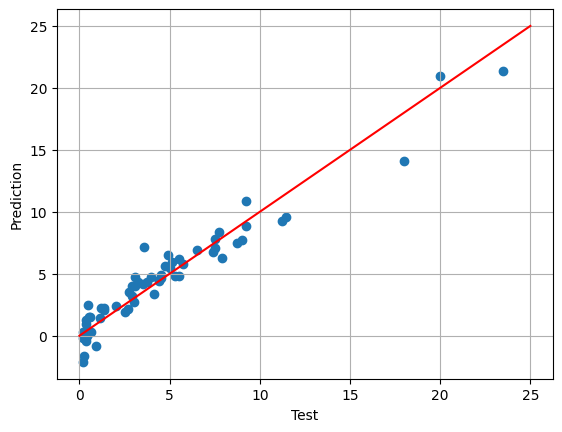

In [874]:
plt.scatter(y_test, y_pred)
plt.plot([0,25], [0,25], color='red')
plt.grid()
plt.xlabel('Test')
plt.ylabel('Prediction')

### Testing with changing the percentage of test and train

In [875]:
regressor_review = LinearRegression()

In [876]:
print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root mean Absolute Error : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score : ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  0.9372395499701511
Mean Squared Error :  1.469118781024335
Root mean Absolute Error :  0.9681113313922893
R2 Score :  0.9334118210784318


In [877]:
########################   Testing with 70% train   ########################
x_train_review, x_test_review, y_train_review, y_test_review = train_test_split(x,y, test_size = 0.3 , random_state = 0)
regressor_review.fit(x_train_review, y_train_review)
y_pred_review = regressor.predict(x_test_review)
###   Check with evaluations
print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test_review,y_pred_review))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test_review,y_pred_review))
print('Root mean Absolute Error : ' , np.sqrt(metrics.mean_absolute_error(y_test_review,y_pred_review)))
print('R2 Score : ' , metrics.r2_score(y_test_review,y_pred_review))

Mean Absolute Error :  1.0468660750309948
Mean Squared Error :  2.1637082596716724
Root mean Absolute Error :  1.0231647350407436
R2 Score :  0.9128976520535541


In [878]:
########################   Testing with 90% train   ########################
x_train_review, x_test_review, y_train_review, y_test_review = train_test_split(x,y, test_size = 0.1 , random_state = 0)
regressor_review.fit(x_train_review, y_train_review)
y_pred_review = regressor_review.predict(x_test_review)
###   Check with evaluations
print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test_review,y_pred_review))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test_review,y_pred_review))
print('Root mean Absolute Error : ' , np.sqrt(metrics.mean_absolute_error(y_test_review,y_pred_review)))
print('R2 Score : ' , metrics.r2_score(y_test_review,y_pred_review))

Mean Absolute Error :  1.0507514283155994
Mean Squared Error :  1.824953834285492
Root mean Absolute Error :  1.0250616704938291
R2 Score :  0.9284896188373731


########################   Result: We use 80% of the data for train.   ########################

### Testing with increasing the parameter

In [879]:
regressor_review = LinearRegression()

In [880]:
###   the most important features (correlation results):
# 1. Present_Price
# 2. Seller_Type
# 3. Fuel_Type
# 4. Transmission
# 5. Age (-)
# 6. Owner
# 7. Kms_Driven

In [881]:
print(regressor.intercept_)
print(regressor.coef_)

[-3.95521604]
[[-3.87900693e-01  5.03778988e-01 -3.96094133e-06  6.32634056e-01
   8.72423313e-02  3.63358067e-01 -1.52619696e-02]]


In [882]:
print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('R2 Score : ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  0.9372395499701511
Mean Squared Error :  1.469118781024335
R2 Score :  0.9334118210784318


#### Present_Price

In [883]:
print('--------------- Present_Price ---------------')
for i in range(2,8):
    print(f'\n===> T = {i}')
    x_review = x.copy()
    x_review.insert(7, f'Present_Price_T{i}', (x_review['Present_Price'])**i)

    x_train_review, x_test_review, y_train_review, y_test_review = train_test_split(x_review,y, test_size = 0.2 , random_state = 0)

    regressor_review.fit(x_train_review, y_train_review)
    y_pred_review = regressor_review.predict(x_test_review)


    print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test_review,y_pred_review))
    print('Mean Squared Error : ' , metrics.mean_squared_error(y_test_review,y_pred_review))
    print('R2 Score : ' , metrics.r2_score(y_test_review,y_pred_review))

--------------- Present_Price ---------------

===> T = 2
Mean Absolute Error :  0.9364270522877614
Mean Squared Error :  1.4678616759443919
R2 Score :  0.9334687996829311

===> T = 3
Mean Absolute Error :  0.9365495101727479
Mean Squared Error :  1.4676425609119053
R2 Score :  0.9334787311269886

===> T = 4
Mean Absolute Error :  0.9373112320199173
Mean Squared Error :  1.4693975599716702
R2 Score :  0.9333991853524003

===> T = 5
Mean Absolute Error :  0.9380586896504791
Mean Squared Error :  1.4751097420613992
R2 Score :  0.9331402792598935

===> T = 6
Mean Absolute Error :  0.9386117455581233
Mean Squared Error :  1.4866361991656452
R2 Score :  0.9326178396873396

===> T = 7
Mean Absolute Error :  0.938945458917361
Mean Squared Error :  1.503959938173903
R2 Score :  0.9318326368517539


In [884]:
### Result:
### Without creating a new parameter

#### Age

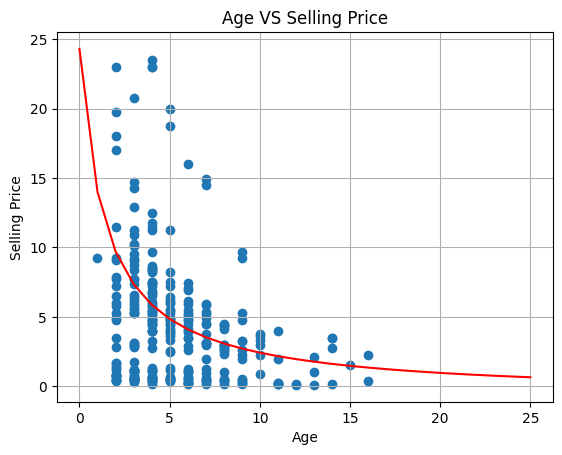

In [885]:
plt.scatter(df5['Age'] , df5['Selling_Price'])
plt.plot(np.array(range(0,26)) , (10/(0.28*(np.array(range(0,26)))+0.4)-0.7), color = 'red')
plt.title('Age VS Selling Price')
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.grid()


In [886]:
x_review = x.copy()
x_review.insert(7, 'Age_2', (10/(0.28*(x_review['Age'])+0.4)-0.7))

x_train_review, x_test_review, y_train_review, y_test_review = train_test_split(x_review,y, test_size = 0.2 , random_state = 0)

regressor_review.fit(x_train_review, y_train_review)
y_pred_review = regressor_review.predict(x_test_review)

print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test_review,y_pred_review))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test_review,y_pred_review))
print('R2 Score : ' , metrics.r2_score(y_test_review,y_pred_review))

Mean Absolute Error :  0.9492967122009762
Mean Squared Error :  1.449176073733379
R2 Score :  0.9343157293113282


In [887]:
print('--------------- Age ---------------')
for i in range(2,18):
    print(f'\n===> T = {i}')
    x_review = x.copy()
    x_review.insert(7, f'Age_T{i}', (x_review['Age'])**i)

    x_train_review, x_test_review, y_train_review, y_test_review = train_test_split(x_review,y, test_size = 0.2 , random_state = 0)

    regressor_review.fit(x_train_review, y_train_review)
    y_pred_review = regressor_review.predict(x_test_review)


    print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test_review,y_pred_review))
    print('Mean Squared Error : ' , metrics.mean_squared_error(y_test_review,y_pred_review))
    print('R2 Score : ' , metrics.r2_score(y_test_review,y_pred_review))

--------------- Age ---------------

===> T = 2
Mean Absolute Error :  0.9500021363153426
Mean Squared Error :  1.435365858036007
R2 Score :  0.9349416808175508

===> T = 3
Mean Absolute Error :  0.9483251482188617
Mean Squared Error :  1.4390566137778384
R2 Score :  0.9347743963835982

===> T = 4
Mean Absolute Error :  0.9468316336842318
Mean Squared Error :  1.4448254133141143
R2 Score :  0.9345129240910607

===> T = 5
Mean Absolute Error :  0.9453007216390292
Mean Squared Error :  1.450906190546656
R2 Score :  0.9342373113308315

===> T = 6
Mean Absolute Error :  0.9449384557936764
Mean Squared Error :  1.4563077440205412
R2 Score :  0.9339924845586064

===> T = 7
Mean Absolute Error :  0.9440625346557816
Mean Squared Error :  1.4606307636353202
R2 Score :  0.9337965426053019

===> T = 8
Mean Absolute Error :  0.944042644514252
Mean Squared Error :  1.463840775352342
R2 Score :  0.933651048015406

===> T = 9
Mean Absolute Error :  0.9441172084194235
Mean Squared Error :  1.466077837

In [888]:
x.insert(7, 'Age_T3', x['Age']**3)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('R2 Score : ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  0.9483251482188617
Mean Squared Error :  1.4390566137778384
R2 Score :  0.9347743963835982


In [889]:
### Result:
### x['Age_T3'] = x['Age']**3

#### Kms_Driven

In [890]:
print('--------------- Kms_Driven ---------------')
for i in range(2,8):
    print(f'\n===> T = {i}')
    x_review = x.copy()
    x_review.insert(8, f'Kms_Driven_T{i}', (x_review['Kms_Driven'])**i)

    x_train_review, x_test_review, y_train_review, y_test_review = train_test_split(x_review,y, test_size = 0.2 , random_state = 0)

    regressor_review.fit(x_train_review, y_train_review)
    y_pred_review = regressor_review.predict(x_test_review)


    print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test_review,y_pred_review))
    print('Mean Squared Error : ' , metrics.mean_squared_error(y_test_review,y_pred_review))
    print('R2 Score : ' , metrics.r2_score(y_test_review,y_pred_review))

--------------- Kms_Driven ---------------

===> T = 2
Mean Absolute Error :  0.9211925520402826
Mean Squared Error :  1.3383955117209136
R2 Score :  0.9393368861977541

===> T = 3
Mean Absolute Error :  0.981172800337469
Mean Squared Error :  1.903623764058379
R2 Score :  0.9137177732408495

===> T = 4
Mean Absolute Error :  3.2213469889779964
Mean Squared Error :  22.061483416224934
R2 Score :  5.770536095139889e-05

===> T = 5
Mean Absolute Error :  3.2146330263704934
Mean Squared Error :  22.11249658571362
R2 Score :  -0.0022544793998344748

===> T = 6
Mean Absolute Error :  3.217787891671708
Mean Squared Error :  22.140924691293606
R2 Score :  -0.003542990448234251

===> T = 7
Mean Absolute Error :  3.2141075799977012
Mean Squared Error :  22.43294531484818
R2 Score :  -0.016778898790840824


In [891]:
x.insert(8, 'Kms_Driven_T2', x['Kms_Driven']**2)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('R2 Score : ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  0.9211925520402826
Mean Squared Error :  1.3383955117209136
R2 Score :  0.9393368861977541


In [892]:
### Result:
### x['Kms_Driven_T2'] = x['Kms_Driven']**2

### Model analysis

In [893]:
print('Mean Absolute Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('R2 Score : ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  0.9211925520402826
Mean Squared Error :  1.3383955117209136
R2 Score :  0.9393368861977541


In [894]:
x_test_review = x_test.copy()
x_test_review.insert(7, 'y_test', y_test)
x_test_review.insert(8, 'y_pred', y_pred)

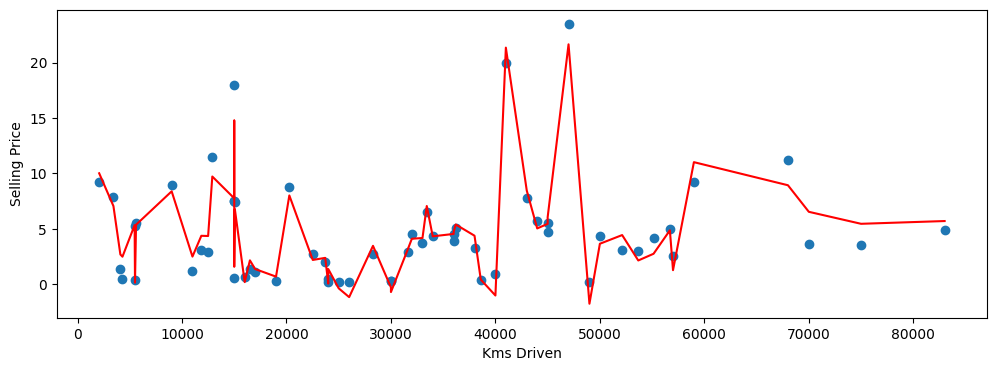

In [895]:
df_review = x_test_review.sort_values(by = ['Kms_Driven'])

a = df_review.Kms_Driven
b = df_review.y_test
c = df_review.Kms_Driven
d = df_review.y_pred
plt.figure(figsize = (12,4))
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.scatter(a , b)
plt.plot(c , d , color = 'red')
plt.show()

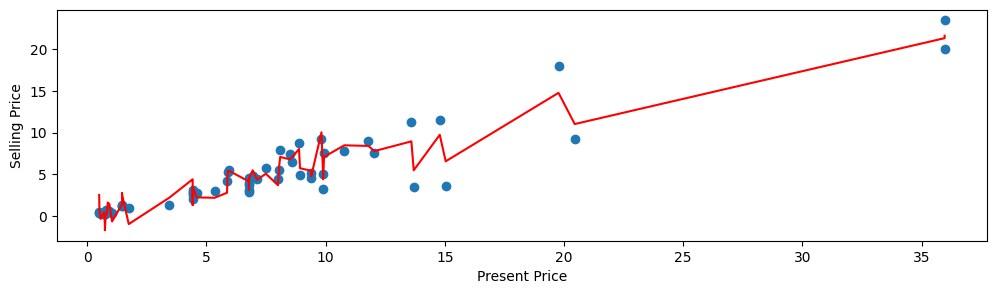

In [896]:
df_review = x_test_review.sort_values(by = ['Present_Price'])

a = df_review.Present_Price
b = df_review.y_test
c = df_review.Present_Price
d = df_review.y_pred
plt.figure(figsize = (12,3))
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.scatter(a , b)
plt.plot(c , d , color = 'red')
plt.show()

Text(0, 0.5, 'Prediction')

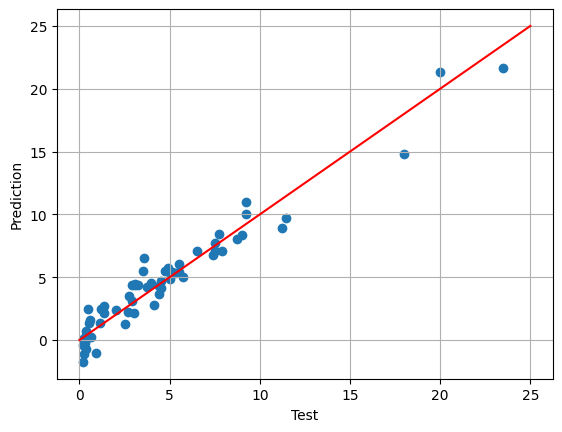

In [897]:
plt.scatter(y_test, y_pred)
plt.plot([0,25], [0,25], color='red')
plt.grid()
plt.xlabel('Test')
plt.ylabel('Prediction')

### Making the final model & Testing by many data

In [898]:
final_regressor = LinearRegression()
final_regressor.fit(x, y)

LinearRegression()

In [899]:
x_input = x.iloc[0:300:45]
y_real = y[0:300:45]
y_output = final_regressor.predict(x_input)

In [900]:
pd.DataFrame({'Real': np.concatenate(y_real), 'Output': np.concatenate(y_output)})

,Real,Output
0,3.35,3.665967
1,7.50,7.844150
2,23.00,19.040872
3,0.60,1.549380
4,0.27,-0.098939
5,4.95,5.647477
6,2.25,2.567100


### Result

In [901]:
print(final_regressor.intercept_)
print(final_regressor.coef_)

[-3.146766]
[[-4.94150627e-01  5.35244164e-01 -2.92382996e-05  7.39432248e-01
   9.87146922e-02  2.02738898e-01 -1.22657146e-01  1.11427277e-03
   6.04733504e-11]]


In [902]:
### Final model

# Y = -3.146766
#     -4.94150627e-01   *   (2019 - Year)
#     +5.35244164e-01   *   Present_Price
#     -2.92382996e-05   *   Kms_Driven
#     +7.39432248e-01   *   Fuel_Type
#     +9.87146922e-02   *   Seller_Type
#     +2.02738898e-01   *   Transmission
#     -1.22657146e-01   *   Owner
#     +1.11427277e-03   *   (2019 - Year) ** 3
#     +6.04733504e-11   *   (Kms_Driven) ** 2

#      Fuel_Type    =>   CNG: 5,  Petrol: 8,  Diesel: 10
#      Seller_Type  =>   Individual: 2,  Dealer: 10
#      Transmission =>   Manual: 3,  Automatic: 5
#      Owner        =>   Yes: 1,  No: 5

In [906]:
### Simple program

year = float(input('Enter year: '))
present_price = float(input('\nEnter present price: '))
kms_driven = float(input('\nEnter kms driven: '))
print('\n(CNG: 5,  Petrol: 8,  Diesel: 10)')
fuel_type = float(input('Enter fuel type: '))
print('\n(Individual: 2,  Dealer: 10)')
seller_type = float(input('Enter seller type: '))
print('\n(Manual: 3,  Automatic: 5)')
transmission = float(input('Enter Transmission: '))
print('\n(Yes: 1,  No: 5)')
owner = float(input('Enter Owner: '))

selling_price = -  3.146766  -  4.94150627e-01 * (2019 - year)  +  5.35244164e-01 * present_price  -  2.92382996e-05 * kms_driven  +  7.39432248e-01 * fuel_type  +  9.87146922e-02 * seller_type  +  2.02738898e-01 * transmission  -  1.22657146e-01 * owner  +  1.11427277e-03 * (2019 - year) ** 3  +  6.04733504e-11 * (kms_driven) ** 2

print(f'\n\n===> Selling price: {selling_price}')


(CNG: 5,  Petrol: 8,  Diesel: 10)

(Individual: 2,  Dealer: 10)

(Manual: 3,  Automatic: 5)

(Yes: 1,  No: 5)


===> Selling price: 2.438931834314817


In [904]:
df5

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,8,10,3,5
1,6,4.75,9.54,43000,10,10,3,5
2,2,7.25,9.85,6900,8,10,3,5
3,8,2.85,4.15,5200,8,10,3,5
4,5,4.60,6.87,42450,10,10,3,5
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,10,10,3,5
297,4,4.00,5.90,60000,8,10,3,5
298,10,3.35,11.00,87934,8,10,3,5
299,2,11.50,12.50,9000,10,10,3,5
